In [2]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
s = make_array(1,7,3,9,5)
s

array([1, 7, 3, 9, 5])

In [4]:
percentile(80,s)

7

In [6]:
percentile(10,s)

1

In [11]:
percentile(10,s)==0

False

In [12]:
5**5

3125

In [13]:
10**10

10000000000

# Bootstrap

In [22]:
sf =  Table.read_table('san_francisco_2019.csv')
sf

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706
Public Protection,Adult Probation,Information Systems,IS Project Director,175742,0,60830,236572
Public Protection,Adult Probation,Information Systems,IT Operations Support Admin IV,123840,0,49429,173269
Public Protection,Adult Probation,"Payroll, Billing & Accounting",Accountant III,111816,0,46319,158135
Public Protection,Adult Probation,"Budget, Admn & Stats Analysis",Statistician,87725,0,38899,126624
Public Protection,Adult Probation,"Budget, Admn & Stats Analysis",Senior Administrative Analyst,116192,0,47651,163843


In [23]:
# How much did Mayor London breed make?
sf.where('Job', 'Mayor')

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Mayor,Administrative & Mgmt (Unrep),Mayor,342974,0,98012,440987


In [24]:
sf.sort('Total Compensation', descending = True)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Retirement Services,Administrative & Mgmt (Unrep),Chief Investment Officer,577633,0,146398,724031
General Administration & Finance,Retirement Services,Unassigned,Managing Director,483072,0,134879,617951
General Administration & Finance,Retirement Services,Unassigned,Managing Director,482649,0,134905,617554
General Administration & Finance,Retirement Services,Unassigned,Managing Director,451507,0,120276,571784
General Administration & Finance,Retirement Services,Unassigned,Managing Director,449378,0,120857,570235
Community Health,Public Health,Administrative & Mgmt (Unrep),"Physician Administrator, DPH",434966,0,119213,554179
Public Protection,Sheriff,Correction & Detention,Senior Deputy Sheriff,152153,315896,77275,545324
General Administration & Finance,Retirement Services,Management,Director,397392,0,108913,506305
Community Health,Public Health,Medical & Dental,Supervising Physician Spec,404701,0,99480,504181
Community Health,Public Health,Medical & Dental,Senior Physician Specialist,400992,0,97428,498421


In [25]:
sf.sort('Total Compensation')

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Probation & Parole,Deputy Probation Officer,0,0,0,0
Public Protection,Fire Department,"Clerical, Secretarial & Steno",Senior Clerk Typist,0,0,0,0
Public Protection,Juvenile Court,Correction & Detention,"Counselor, Juvenile Hall PERS",0,0,0,0
Public Protection,Police,"Clerical, Secretarial & Steno",Clerk Typist,0,0,0,0
Public Protection,Sheriff,Correction & Detention,Deputy Sheriff,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Sub-Professional Engineering,StdntDsgn Train2/Arch/Eng/Plng,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,"Clerical, Secretarial & Steno",Executive Secretary 1,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,"Payroll, Billing & Accounting",Senior Account Clerk,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Housekeeping & Laundry,Custodian,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Housekeeping & Laundry,Custodian,0,0,0,0


In [26]:
# Assuming $15 min pay, 20 hours per week for one year.
15*20*52

15600

In [27]:
# We chose to work with the data for people who worked at least 20 hours/ week.
sf = sf.where('Salary', are.above(15000))
sf.num_rows

37103

In [55]:
# This is our population, lets find the population median for total compensatiojn.
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

135747.0

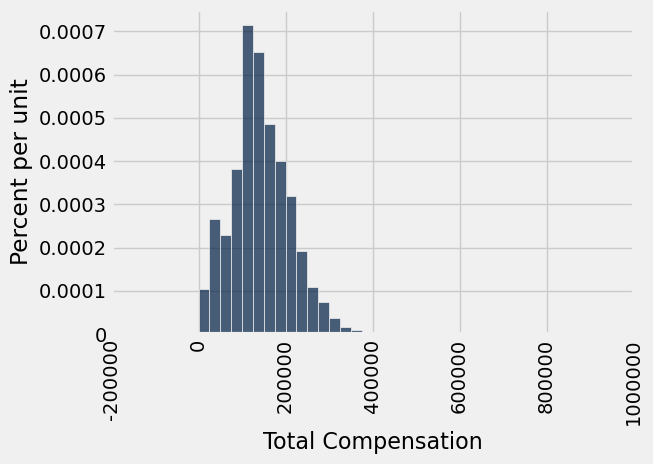

In [30]:
sf_bins = np.arange(0, 800000, 25000)
sf.hist('Total Compensation', bins = sf_bins)

In [31]:
# We will darw a sample of size 300 which will be our random sample.
my_sample = sf.sample(300, with_replacement = False)

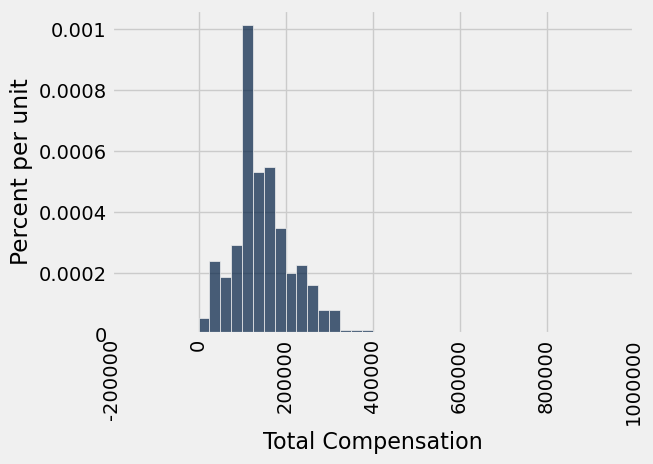

In [32]:
my_sample.hist('Total Compensation', bins = sf_bins)

In [33]:
est_median = percentile(50, my_sample.column('Total Compensation'))
est_median

135211.0

In [37]:
# We will draw a bootstrap to find a range for our estimates.
# we do not need to specify the sample size in the () as by default
# It is the same size and it is with replacement.

resample_1 = my_sample.sample()

In [38]:
resample_1_median = percentile(50, resample_1.column('Total Compensation'))
resample_1_median

135211.0

In [74]:
# Defining a function to do lots of bootstrap samples.
# Original sample is the table containing the original sample 
# Label: column containing the variable
# Replications: number of bootstrap samples

def bootstrap_median(original_sample, label, replications):
    medians = make_array()
    for i in np.arange(replications):
        bootstrap_sample = original_sample.sample()
        resampled_median = percentile(50, bootstrap_sample.column(label))
        medians = np.append(medians, resampled_median)
    return medians  

In [66]:
sfbs_median = bootstrap_median(my_sample, 'Total Compensation', 5000)
sfbs_median

array([ 125789.,  141916.,  136080., ...,  139000.,  128842.,  135125.])

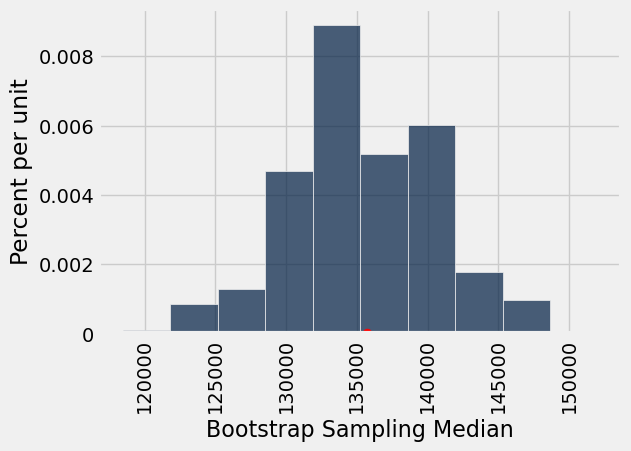

In [67]:
sampled_medians = Table().with_column('Bootstrap Sampling Median', sfbs_median)
sampled_medians.hist()
plots.scatter(pop_median, 0, color = 'red', s = 40)

In [70]:
left = percentile(5, sfbs_median)
left

126489.0

In [71]:
right = percentile(95, sfbs_median)
right

143623.0

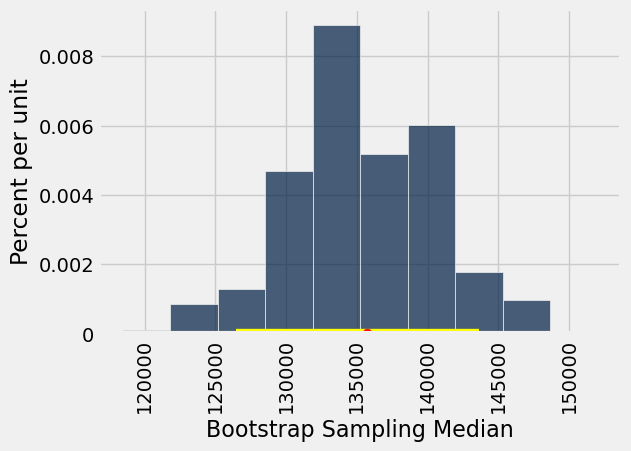

In [77]:
sampled_medians.hist()
plots.plot([left, right], (0, 0), color = 'yellow', lw = 6, zorder = 1)
plots.scatter(pop_median, 0, color = 'red', s = 40)